In [102]:
pwd

'C:\\Users\\DELL\\Practical Assignment'

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [119]:
completedf = pd.read_csv("house_data_complete.csv")
training = pd.read_csv("house_prices_data_training_data.csv")
training = training.dropna()
print(training.isnull().values.sum())
completedf.iloc[:3]

0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [120]:
# cleaning the dataset

completedf1 = completedf.drop(['id','date','zipcode','lat','long'],1)
training1 = training.drop(['id','date','zipcode','lat','long'],1)



In [175]:
training2 = completedf1[round(TestPlusVal.shape[0]/2): 19805]
Valdf2 =  completedf1[19806 : ]
Testdf2 = completedf1[0 :round(TestPlusVal.shape[0]/2) ]
Testdf2.shape[0]
TestPlusVal.shape[0]

3613

In [147]:
# validation and test sets split



k_fold = 3

 for i in range(3):
        if (i == 1):
            TestPlusVal = completedf1[18000:]
            Valdf = TestPlusVal[:round(TestPlusVal.shape[0]/2)]
            Testdf =  TestPlusVal[round(TestPlusVal.shape[0]/2):] 
        elif (i == 2):
            training1 = completedf1[TestPlusVal.shape[0]:]
            Valdf =  completedf1[0:round(TestPlusVal.shape[0]/2)]
            Testdf = completedf1[round(TestPlusVal.shape[0]/2) :TestPlusVal.shape[0]]
        else : 
            training1 = completedf1[round(TestPlusVal.shape[0]/2): 19805]
            Valdf1 =  completedf1[19806 : ]
            Testdf1 = completedf1[0 :round(TestPlusVal.shape[0]/2) ]
            

#TestPlusVal = completedf1[18000:]

#Valdf = TestPlusVal[:round(TestPlusVal.shape[0]/2)]
#Testdf =  TestPlusVal[round(TestPlusVal.shape[0]/2):]

#hyp 1

y_train1 = training1['price']
x_train1 = training1.drop(['price'],1)

train_size1 = y_train1.size

X_train1 = (x_train1 - x_train1.min())/(x_train1.max() - x_train1.min())




y_val1 = Valdf['price']
x_val1 = Valdf.drop(['price'],1)

val_size1 = y_val1.size

X_val1 = (x_val1 - x_val1.min())/(x_val1.max() - x_val1.min())




y_test1 = Testdf['price']
x_test1 = Testdf.drop(['price'],1)

test_size1 = y_test1.size

X_test1 = (x_test1 - x_test1.min())/(x_test1.max() - x_test1.min())

print(X_test1.shape[1])

X_train1 = np.concatenate([np.ones((train_size1, 1)), X_train1], axis=1)
X_val1 = np.concatenate([np.ones((val_size1, 1)), X_val1], axis=1)
X_test1 = np.concatenate([np.ones((test_size1, 1)), X_test1], axis=1)
print(X_test1.shape[1])


#hyp 2

y_train2 = training1['price']
x_train2 = training1.drop(['price'],1)

x_train2['sqft_living15'] = x_train2['sqft_living15']**2


train_size2 = y_train2.size

X_train2 = (x_train2 - x_train2.min())/(x_train2.max() - x_train2.min())




y_val2 = Valdf['price']
x_val2 = Valdf.drop(['price'],1)


x_val2['sqft_living15'] = x_val2['sqft_living15']**2

val_size2 = y_val2.size

X_val2 = (x_val2 - x_val2.min())/(x_val2.max() - x_val2.min())




y_test2 = Testdf['price']
x_test2 = Testdf.drop(['price'],1)

x_test2['sqft_living15'] = x_test2['sqft_living15']**2

test_size2 = y_test2.size

X_test2 = (x_test2 - x_test2.min())/(x_test2.max() - x_test2.min())



X_train2 = np.concatenate([np.ones((train_size2, 1)), X_train2], axis=1)
X_val2 = np.concatenate([np.ones((val_size2, 1)), X_val2], axis=1)
X_test2 = np.concatenate([np.ones((test_size2, 1)), X_test2], axis=1)

#hyp 3

y_train3 = training1['price']
x_train3 = training1.drop(['price'],1)


poly = PolynomialFeatures(2)

# Transforming the data into the sixth power polynomial
x_train3 = poly.fit_transform(x_train3)


train_size3 = y_train3.size

X_train3 = (x_train3 - x_train3.min())/(x_train3.max() - x_train3.min())




y_val3 = Valdf['price']
x_val3 = Valdf.drop(['price'],1)


x_val3 = poly.fit_transform(x_val3)

val_size3 = y_val3.size

X_val3 = (x_val3 - x_val3.min())/(x_val3.max() - x_val3.min())




y_test3 = Testdf['price']
x_test3 = Testdf.drop(['price'],1)

x_test3 = poly.fit_transform(x_test3)

test_size3 = y_test3.size

X_test3 = (x_test3 - x_test3.min())/(x_test3.max() - x_test3.min())


X_train3 = np.concatenate([np.ones((train_size3, 1)), X_train3], axis=1)
X_val3 = np.concatenate([np.ones((val_size3, 1)), X_val3], axis=1)
X_test3 = np.concatenate([np.ones((test_size3, 1)), X_test3], axis=1)


###################################################################################################


15
16


In [122]:
def computeCost(X, y, theta, Lambda):
    
    sumofh0x=np.dot(X,theta)
    J = ( np.dot((sumofh0x - y), (sumofh0x - y)) / (2 * train_size) ) + ((1/2 * Lambda * np.sum(np.square(theta[1:]))) / train_size)    
    return J

In [123]:
def computeCostCV(X, y, theta):
    
    sumofh0x=np.dot(X,theta)
    J =  np.dot((sumofh0x - y), (sumofh0x - y)) / (2 * val_size)     
    return J

In [124]:
def gradientDescent(X, y, X_cv,Y_cv, theta, Lambda, alpha, num_iters):
    
    # Initialize some useful values
    train_size = y.size  # number of training examples
    val_size = Y_cv.size
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    J_cv = []
    
    thetaNoZeroReg = np.insert(theta[1:], 0, 0)
    
    
    for i in range(num_iters):
        sumofh0x=np.dot(X,theta)
        theta=theta-((alpha/train_size)*(np.dot(X.T,sumofh0x-y))) + (Lambda * thetaNoZeroReg)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta, Lambda))
        
    J_cv.append(computeCostCV(X_cv, Y_cv, theta)) 
    return theta, J_history, J_cv

In [125]:
initial_theta1 = np.zeros((X_train.shape[1]))


theta computed from gradient descent: [-160924.97187421  -39421.93735163  389076.07028359  564244.24720346
   -9919.83345161   82454.93902804  472044.81470698  208860.62976614
   77249.69931854  960382.67168428  620441.64611516  378071.42215528
 -431921.6792723    34813.47785841  509659.01996246  -52963.4064696 ]


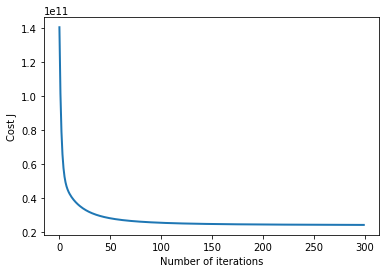

In [137]:
# hypothesis 1  linear

initial_theta1 = np.zeros((X_train1.shape[1]))
Lambda = np.array([0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28, 2.56, 5.12
                  , 10.24])
alpha = 0.8
num_iters = 300
J_cv_all1 = []

for i in range(Lambda.size):
    theta1, J_history1, J_cv1 = gradientDescent(X_train1, y_train1, X_val1, y_val1, initial_theta1, Lambda[i], alpha, num_iters)
    J_cv_all1.append(J_cv1)
    
   
    
# Plot the convergence graph
pyplot.plot(np.arange(len(J_history1)), J_history1, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta1)))


theta computed from gradient descent: [-116234.22613603  -28838.76556054  398818.9658466   579806.57632036
   -5993.93630799   76095.74985523  467651.53724072  208064.44381738
   78973.82405702  987494.22940635  638876.3558993   386018.74539615
 -428290.91110158   33800.04045172  642294.86207961  -46528.97811672]


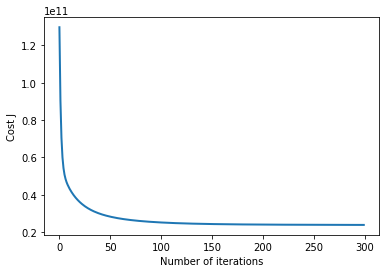

In [136]:
#hypothesis 2  squaring 1 feature

initial_theta2 = np.zeros((X_train2.shape[1]))
Lambda = np.array([0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28, 2.56, 5.12
                  , 10.24])
alpha = 0.8
num_iters = 300
J_cv_all2 = []

for i in range(Lambda.size):
    theta2, J_history2, J_cv2 = gradientDescent(X_train2, y_train2, X_val2, y_val2, initial_theta2, Lambda[i], alpha, num_iters)
    J_cv_all2.append(J_cv2)

    # Plot the convergence graph
pyplot.plot(np.arange(len(J_history2)), J_history2, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta2)))


theta computed from gradient descent: [5.33064935e+05 1.95477655e-07 1.03555511e-06 9.33885929e-07
 1.24728258e-03 8.11989627e-03 4.71455164e-07 3.39633978e-08
 4.67146925e-07 7.16441353e-07 2.51957461e-06 9.93122515e-04
 2.54160067e-04 3.85932652e-04 9.36204706e-05 9.24777827e-04
 5.47336656e-03 5.14961502e-06 4.27906858e-06 5.55774212e-03
 3.48637933e-02 2.21624770e-06 1.31850830e-07 1.89398252e-06
 3.72796970e-06 1.18674439e-05 4.44576408e-03 1.11197804e-03
 2.04128199e-03 3.95570727e-04 4.13313142e-03 2.45321045e-02
 3.69857399e-06 4.69861838e-03 3.09620075e-02 1.87004690e-06
 1.17274682e-07 1.56106306e-06 3.29389473e-06 1.02091310e-05
 3.77100680e-03 9.27611580e-04 1.84269276e-03 3.24905099e-04
 3.42185186e-03 2.19137844e-02 6.16758924e+00 4.12188653e+01
 2.43315223e-03 1.56551893e-04 1.97198198e-03 4.37019265e-03
 1.33271726e-02 4.94273237e+00 1.22485687e+00 2.46185610e+00
 3.97421842e-01 4.42510714e+00 2.94203241e+01 1.81268356e+03
 1.63580663e-02 8.44246652e-04 1.09400510e-02 2

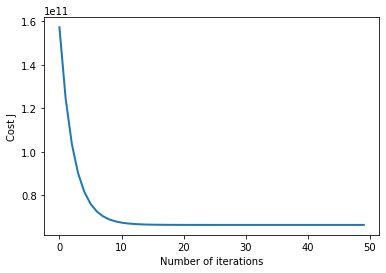

In [135]:
#hypothesis 3  polynomial

initial_theta3 = np.zeros((X_train3.shape[1]))
Lambda = np.array([0.01, 0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28, 2.56, 5.12
                  , 10.24])
alpha = 0.2
num_iters = 50
J_cv_all3 = []

for i in range(Lambda.size):
    theta3, J_history3, J_cv3 = gradientDescent(X_train3, y_train3, X_val3, y_val3, initial_theta3, Lambda[i], alpha, num_iters)
    J_cv_all3.append(J_cv3)
    
# Plot the convergence graph
pyplot.plot(np.arange(len(J_history3)), J_history3, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta3)))   


In [158]:

min_cv1 = min(J_cv_all1)
min_cv2 = min(J_cv_all2)
min_cv3 = min(J_cv_all3)

if (min_cv1 < min_cv2 and   min_cv1 < min_cv3):
    J_test = computeCostCV(X_test1, y_test1, theta1)
elif (min_cv2 < min_cv1 and   min_cv2 < min_cv3):   
    J_test = computeCostCV(X_test2, y_test2, theta2)
elif (min_cv3 < min_cv1 and   min_cv3 < min_cv2):      
    J_test = computeCostCV(X_test3, y_test3, theta3)

print(J_test)  

36259352902.51437


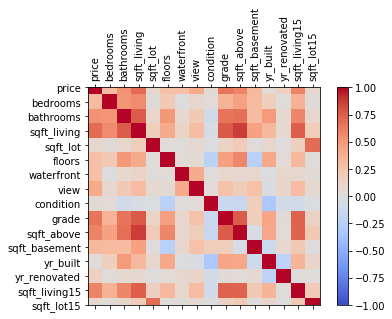

In [10]:
names=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement']
corr = training.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(training.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(training.columns)
ax.set_yticklabels(training.columns)
plt.show()

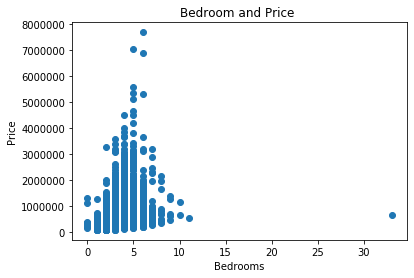

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [27]:
plt.scatter(training.bedrooms,training.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

Text(0.5, 1.0, 'Price vs yr_built')

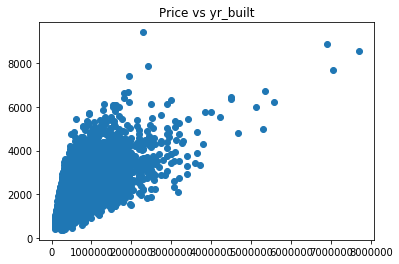

In [48]:
plt.scatter(training.price,training.sqft_above)
plt.title("Price vs yr_built")

Text(0.5, 1.0, 'Price vs Square Feet')

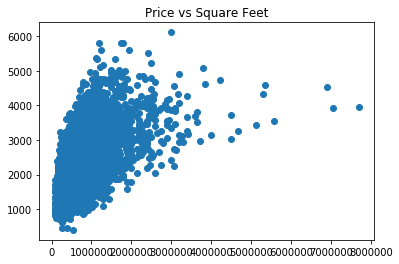

In [38]:
plt.scatter(training.price,training.sqft_living15)
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Square Feet')

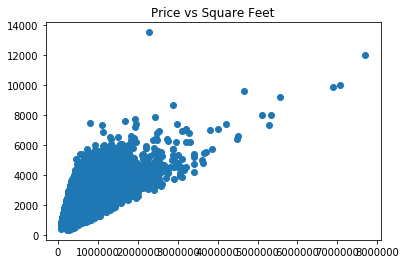

In [28]:
plt.scatter(training.price,training.sqft_living)
plt.title("Price vs Square Feet")

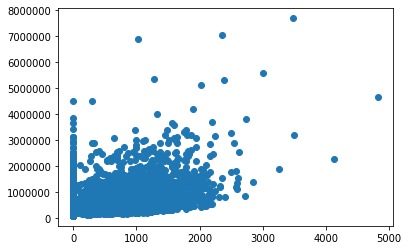

In [29]:
plt.scatter((training['sqft_basement']),training['price'])

Text(0.5, 1.0, 'Waterfront vs Price ( 0= no waterfront)')

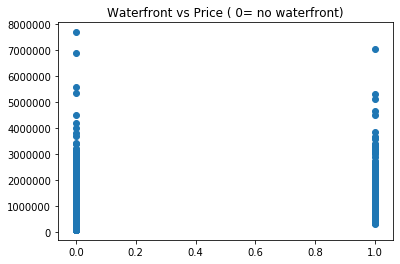

In [30]:
plt.scatter(training.waterfront,training.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")

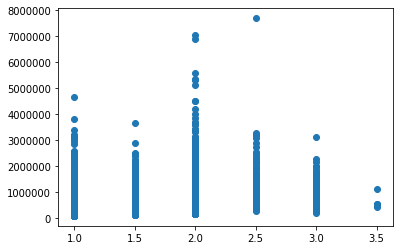

In [31]:
plt.scatter(training.floors,training.price)

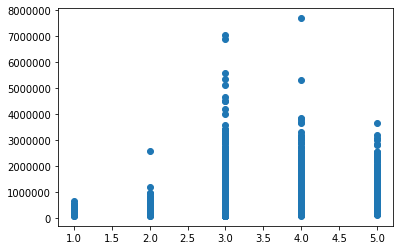

In [32]:
plt.scatter(training.condition,training.price)